Імпортуємо модулі, задаємо x від 0 до 20, рахуємо y та z за умовою.

$y = x \cdot \sin(x) \cdot \cos(x)$

$z = \cos(\sin(y)) \cdot \sin(x)$

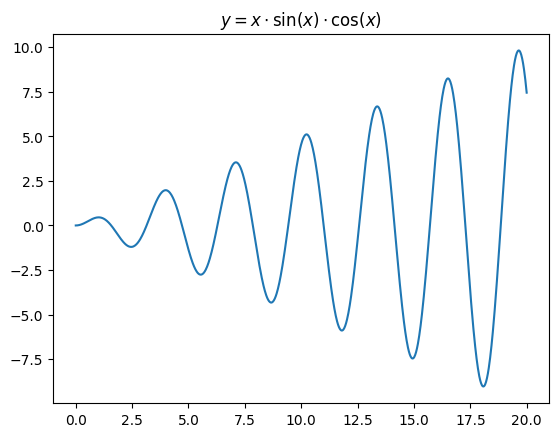

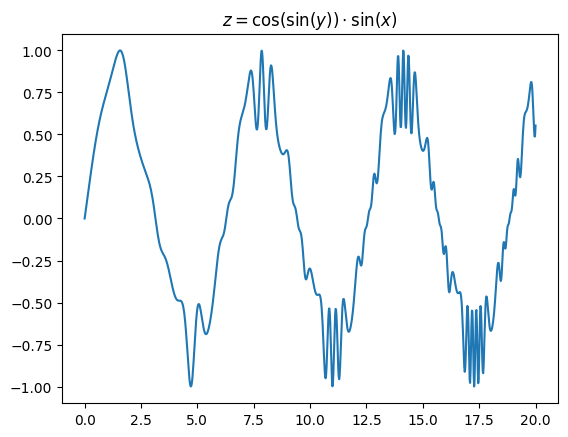

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from tabulate import tabulate
from sklearn.metrics import mean_squared_error, mean_absolute_error

QUALITY = 1000

x_values = np.linspace(0, 20, QUALITY)
y_values = x_values * np.sin(x_values) * np.cos(x_values)
z_values = np.cos(np.sin(y_values)) * np.sin(x_values)

plt.plot(x_values, y_values)
plt.title("$y = x \\cdot \\sin(x) \\cdot \\cos(x)$")
plt.show()

plt.plot(x_values, z_values)
plt.title("$z = \\cos(\\sin(y)) \\cdot \\sin(x)$")
plt.show()

Створюємо проміжки для функції приналежності. По 6 для вхідних даних, 9 для вихідних.

In [2]:
x_means = np.linspace(float(np.min(x_values)), float(np.max(x_values)), 6)
y_means = np.linspace(float(np.min(y_values)), float(np.max(y_values)), 6)
z_means = np.linspace(float(np.min(z_values)), float(np.max(z_values)), 9)

step_x = (float(np.max(x_values)) - float(np.min(x_values))) / (6 - 1)
step_y = (float(np.max(y_values)) - float(np.min(y_values))) / (6 - 1)
step_z = (float(np.max(z_values)) - float(np.min(z_values))) / (9 - 1)

Трикутні функції приналежності та їх графіки.

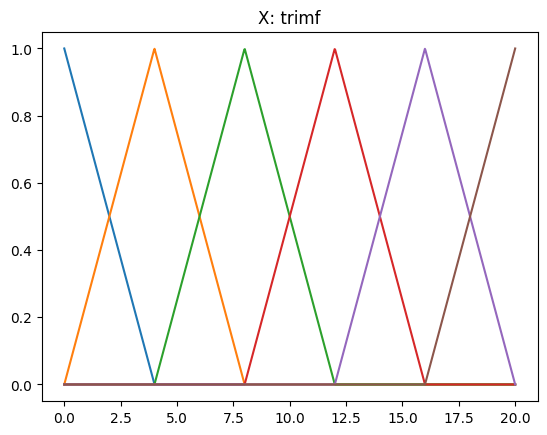

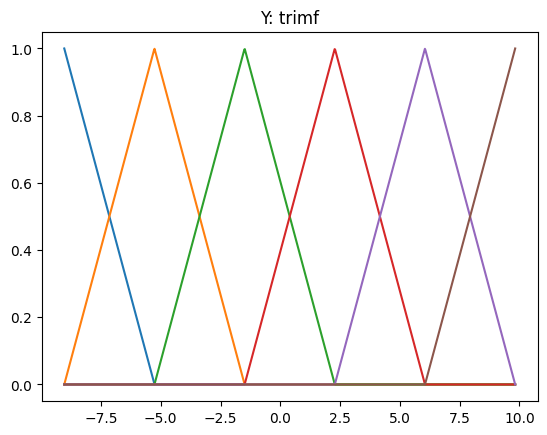

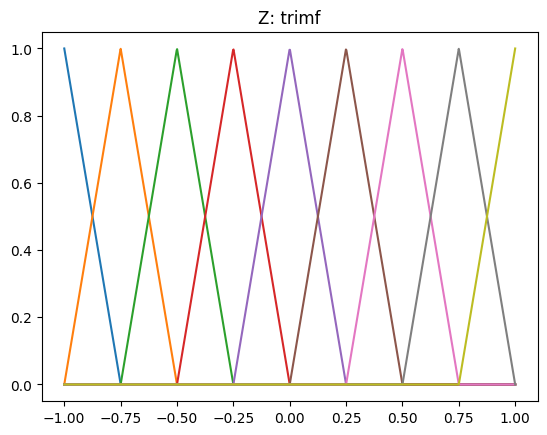

In [3]:
for i in range(6):
    plt.plot(
        x_values,
        fuzz.trimf(x_values, [x_means[i] - step_x, x_means[i], x_means[i] + step_x]),
    )
plt.title("X: trimf")
plt.show()

yy = np.linspace(float(np.min(y_values)), float(np.max(y_values)), QUALITY)
for i in range(6):
    plt.plot(yy, fuzz.trimf(yy, [y_means[i] - step_y, y_means[i], y_means[i] + step_y]))
plt.title("Y: trimf")
plt.show()

zz = np.linspace(float(np.min(z_values)), float(np.max(z_values)), QUALITY)
for i in range(9):
    plt.plot(zz, fuzz.trimf(zz, [z_means[i] - step_z, z_means[i], z_means[i] + step_z]))
plt.title("Z: trimf")
plt.show()

Трапецієподібні функції приналежності та їх графіки.

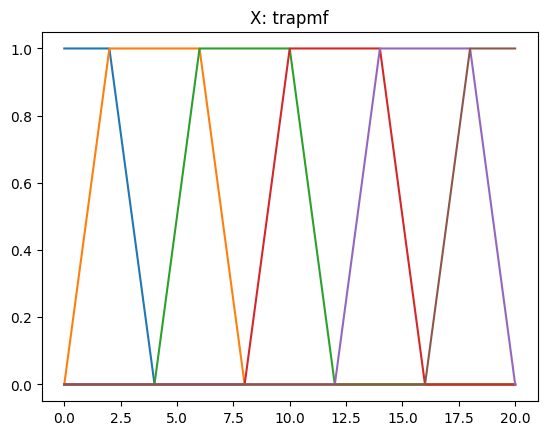

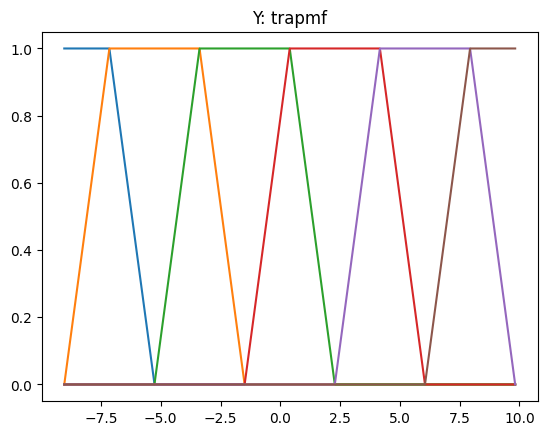

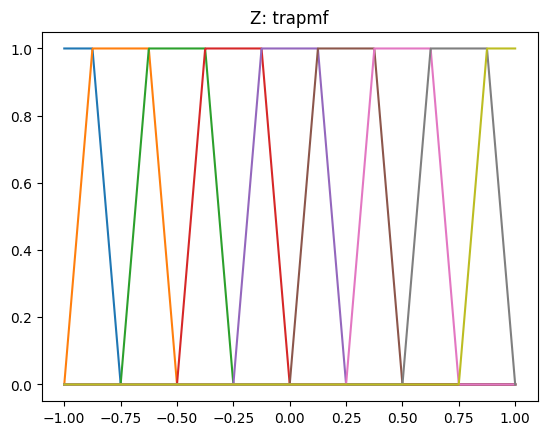

In [4]:
for i in range(6):
    plt.plot(
        x_values,
        fuzz.trapmf(
            x_values,
            [
                x_means[i] - step_x,
                x_means[i] - step_x / 2,
                x_means[i] + step_x / 2,
                x_means[i] + step_x,
            ],
        ),
    )
plt.title("X: trapmf")
plt.show()

for i in range(6):
    plt.plot(
        yy,
        fuzz.trapmf(
            yy,
            [
                y_means[i] - step_y,
                y_means[i] - step_y / 2,
                y_means[i] + step_y / 2,
                y_means[i] + step_y,
            ],
        ),
    )
plt.title("Y: trapmf")
plt.show()

for i in range(9):
    plt.plot(
        zz,
        fuzz.trapmf(
            zz,
            [
                z_means[i] - step_z,
                z_means[i] - step_z / 2,
                z_means[i] + step_z / 2,
                z_means[i] + step_z,
            ],
        ),
    )
plt.title("Z: trapmf")
plt.show()

Гаусівські функції приналежності та їх графіки.

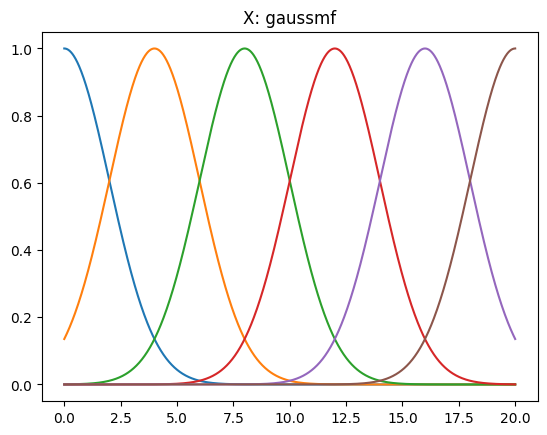

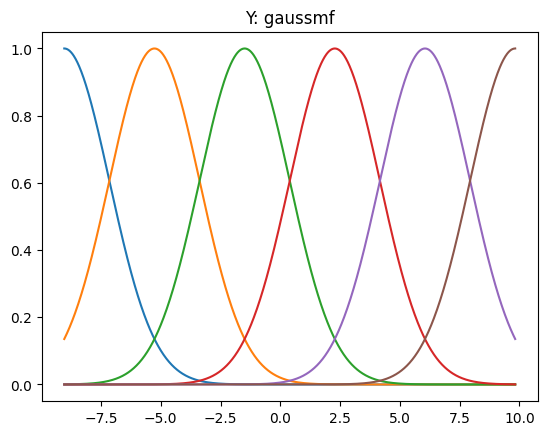

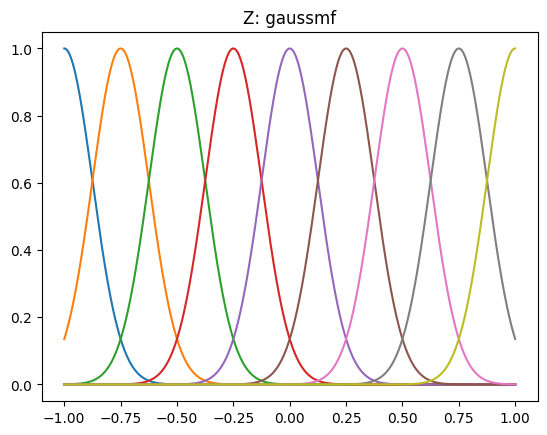

In [5]:
for i in range(6):
    plt.plot(x_values, fuzz.gaussmf(x_values, x_means[i], step_x / 2))
plt.title("X: gaussmf")
plt.show()

for i in range(6):
    plt.plot(yy, fuzz.gaussmf(yy, y_means[i], step_y / 2))
plt.title("Y: gaussmf")
plt.show()

for i in range(9):
    plt.plot(zz, fuzz.gaussmf(zz, z_means[i], step_z / 2))
plt.title("Z: gaussmf")
plt.show()

Допоміжні функції для обчислення ступеня приналежності і вибору найкращої функції приналежності

In [6]:
def calculate_trimf(x, m, diff):
    a, b, c = m - diff, m, m + diff
    if a <= x < b:
        return (x - a) / (b - a)
    elif b <= x <= c:
        return (c - x) / (c - b)
    else:
        return 0


def functionCompareTri(value, means, diff):
    best_func_value = -1.0
    best_index = -1
    for index, mean in enumerate(means):
        ff = calculate_trimf(value, mean, diff)
        if ff > best_func_value:
            best_func_value = ff
            best_index = index
    return best_index

Трикутні функції приналежності: формуємо таблицю правил за максимумом вихідних функцій приналежності, будуємо модель і рахуємо похибки.

Таблиця значень
+-------+---+-------+------+-------+-------+-------+
| y\x   | 0 |  4    | 8    | 12    | 16    | 20    |
+-------+---+-------+------+-------+-------+-------+
| -9.04 | 0 | -0.7  | 0.92 | -0.5  | -0.27 |  0.85 |
+-------+---+-------+------+-------+-------+-------+
| -5.26 | 0 | -0.5  | 0.65 | -0.35 | -0.19 |  0.6  |
+-------+---+-------+------+-------+-------+-------+
| -1.49 | 0 | -0.41 | 0.54 | -0.29 | -0.16 |  0.5  |
+-------+---+-------+------+-------+-------+-------+
| 2.28  | 0 | -0.55 | 0.72 | -0.39 | -0.21 |  0.66 |
+-------+---+-------+------+-------+-------+-------+
| 6.05  | 0 | -0.74 | 0.96 | -0.52 | -0.28 |  0.89 |
+-------+---+-------+------+-------+-------+-------+
| 9.82  | 0 | -0.7  | 0.92 | -0.5  | -0.27 |  0.85 |
+-------+---+-------+------+-------+-------+-------+
Таблица з назвами функцій
+-----+-----+-----+-----+-----+-----+-----+
| y\x | mx1 | mx2 | mx3 | mx4 | mx5 | mx6 |
+-----+-----+-----+-----+-----+-----+-----+
| my1 | mf5 | mf2 | mf9 | mf3 |

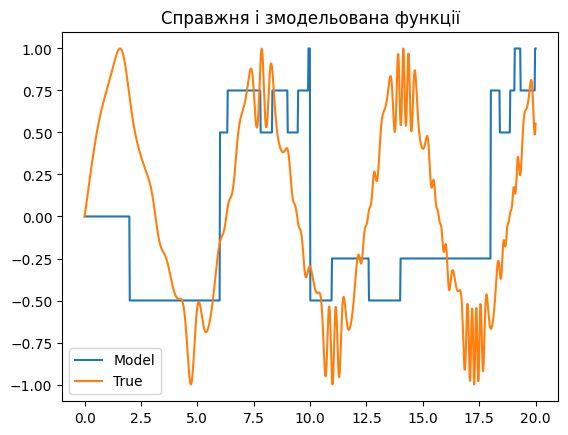

Mean Squared Error (MSE) = 0.3677986820695678
Mean Absolute Error (MAE) = 0.4859365171322268


In [7]:
print("Таблиця значень")
table = [["y\\x"] + [str(x) for x in x_means]]
for y_value in y_means:
    row = [round(y_value, 2)]
    for x in x_means:
        z = np.cos(np.sin(y_value)) * np.sin(x)
        row.append(round(z, 2))
    table.append(row)
print(tabulate(table, tablefmt="grid"))


rules = {}
table = [["y\\x"] + ["mx" + str(i) for i in range(1, 7)]]
for i in range(6):
    row = [f"my{i + 1}"]
    for j in range(6):
        z = np.cos(np.sin(y_means[i])) * np.sin(x_means[j])
        best_func = functionCompareTri(z, z_means, step_z)
        row.append("mf" + str(best_func + 1))
        rules[(j, i)] = best_func
    table.append(row)
print("Таблица з назвами функцій")
print(tabulate(table, tablefmt="grid"))

print("\nRules:")
for rule in rules.keys():
    print(
        f"if (x is mx{rule[0] + 1}) and (y is my{rule[1] + 1}) then (z is mf{rules[rule] + 1})"
    )

z_output = []
for x in x_values:
    best_x_func = functionCompareTri(x, x_means, step_x)
    best_y_func = functionCompareTri(x * np.sin(x) * np.cos(x), y_means, step_y)
    best_z_func = rules[(best_x_func, best_y_func)]
    z_output.append(z_means[best_z_func])
z_output = np.array(z_output)

plt.plot(x_values, z_output, label="Model")
plt.plot(x_values, z_values, label="True")
plt.title("Справжня і змодельована функції")
plt.legend()
plt.show()

mse = mean_squared_error(z_values, z_output)
mae = mean_absolute_error(z_values, z_output)
print(f"Mean Squared Error (MSE) = {mse}")
print(f"Mean Absolute Error (MAE) = {mae}")


Трапецієподібні функції приналежності: формуємо таблицю правил за максимумом вихідних функцій приналежності, будуємо модель і рахуємо похибки.

In [8]:
def calculate_trapmf(x, m, half, top):
    a, b, c, d = m - half, m - top, m + top, m + half
    if a <= x < b:
        return (x - a) / (b - a)
    elif b <= x <= c:
        return 1
    elif c < x <= d:
        return (d - x) / (d - c)
    else:
        return 0


def functionCompareTrap(value, means, diff, top):
    best_func_value = -1.0
    best_index = -1
    for index, mean in enumerate(means):
        ff = calculate_trapmf(value, mean, diff, top)
        if ff > best_func_value:
            best_func_value = ff
            best_index = index
    return best_index

Таблица з назвами функцій
+-----+-----+-----+-----+-----+-----+-----+
| y\x | mx1 | mx2 | mx3 | mx4 | mx5 | mx6 |
+-----+-----+-----+-----+-----+-----+-----+
| my1 | mf5 | mf2 | mf9 | mf3 | mf4 | mf8 |
+-----+-----+-----+-----+-----+-----+-----+
| my2 | mf5 | mf3 | mf8 | mf4 | mf4 | mf7 |
+-----+-----+-----+-----+-----+-----+-----+
| my3 | mf5 | mf3 | mf7 | mf4 | mf4 | mf7 |
+-----+-----+-----+-----+-----+-----+-----+
| my4 | mf5 | mf3 | mf8 | mf3 | mf4 | mf8 |
+-----+-----+-----+-----+-----+-----+-----+
| my5 | mf5 | mf2 | mf9 | mf3 | mf4 | mf9 |
+-----+-----+-----+-----+-----+-----+-----+
| my6 | mf5 | mf2 | mf9 | mf3 | mf4 | mf8 |
+-----+-----+-----+-----+-----+-----+-----+

Rules:
if (x is mx1) and (y is my1) then (z is mf5)
if (x is mx2) and (y is my1) then (z is mf2)
if (x is mx3) and (y is my1) then (z is mf9)
if (x is mx4) and (y is my1) then (z is mf3)
if (x is mx5) and (y is my1) then (z is mf4)
if (x is mx6) and (y is my1) then (z is mf8)
if (x is mx1) and (y is my2) then (z

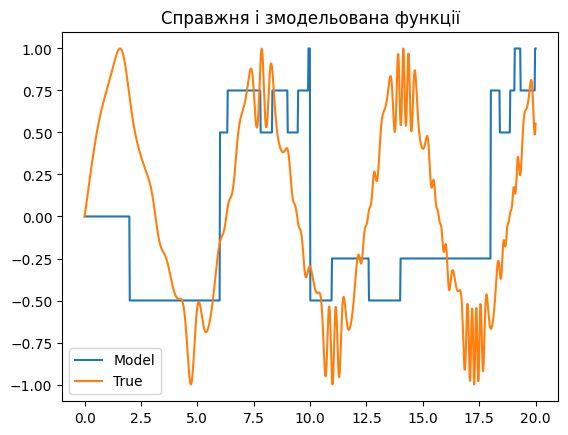


Mean Squared Error (MSE) = 0.3677986820695678
Mean Absolute Error (MAE) = 0.4859365171322268


In [9]:
rules = {}
table = [["y\\x"] + ["mx" + str(i) for i in range(1, 7)]]
for i in range(6):
    row = [f"my{i + 1}"]
    for j in range(6):
        z = np.cos(np.sin(y_means[i])) * np.sin(x_means[j])
        best_func = functionCompareTrap(z, z_means, step_z, step_z / 2)
        row.append(f"mf{best_func+1}")
        rules[(j, i)] = best_func
    table.append(row)
print("Таблица з назвами функцій")
print(tabulate(table, tablefmt="grid"))

print("\nRules:")
for rule in rules.keys():
    print(
        f"if (x is mx{rule[0] + 1}) and (y is my{rule[1] + 1}) then (z is mf{rules[rule] + 1})"
    )

z_output = []
for x in x_values:
    best_x_func = functionCompareTrap(x, x_means, step_x, step_x / 2)
    best_y_func = functionCompareTrap(
        x * np.sin(x) * np.cos(x), y_means, step_y, step_y / 2
    )
    best_z_func = rules[(best_x_func, best_y_func)]
    z_output.append(z_means[best_z_func])
z_output = np.array(z_output)

plt.plot(x_values, z_output, label="Model")
plt.plot(x_values, z_values, label="True")
plt.title("Справжня і змодельована функції")
plt.legend()
plt.show()

mse = mean_squared_error(z_values, z_output)
mae = mean_absolute_error(z_values, z_output)
print(f"\nMean Squared Error (MSE) = {mse}")
print(f"Mean Absolute Error (MAE) = {mae}")

Гауссівські функції приналежності: формуємо таблицю правил за максимумом вихідних функцій приналежності, будуємо модель і рахуємо похибки.

In [10]:
def calculate_gaussmf(x, m, s):
    if s == 0:
        return 1.0 if x == m else 0.0
    return float(np.exp(-((x - m) ** 2) / (2 * s**2)))


def functionCompareGauss(value, means, sigma):
    best_func_value = -1.0
    best_index = -1
    for index, mean in enumerate(means):
        ff = calculate_gaussmf(value, mean, sigma)
        if ff > best_func_value:
            best_func_value = ff
            best_index = index
    return best_index

Таблица з назвами функцій
+-----+-----+-----+-----+-----+-----+-----+
| y\x | mx1 | mx2 | mx3 | mx4 | mx5 | mx6 |
+-----+-----+-----+-----+-----+-----+-----+
| my1 | mf5 | mf2 | mf9 | mf3 | mf4 | mf8 |
+-----+-----+-----+-----+-----+-----+-----+
| my2 | mf5 | mf3 | mf8 | mf4 | mf4 | mf7 |
+-----+-----+-----+-----+-----+-----+-----+
| my3 | mf5 | mf3 | mf7 | mf4 | mf4 | mf7 |
+-----+-----+-----+-----+-----+-----+-----+
| my4 | mf5 | mf3 | mf8 | mf3 | mf4 | mf8 |
+-----+-----+-----+-----+-----+-----+-----+
| my5 | mf5 | mf2 | mf9 | mf3 | mf4 | mf9 |
+-----+-----+-----+-----+-----+-----+-----+
| my6 | mf5 | mf2 | mf9 | mf3 | mf4 | mf8 |
+-----+-----+-----+-----+-----+-----+-----+

Rules:
if (x is mx1) and (y is my1) then (z is mf5)
if (x is mx2) and (y is my1) then (z is mf2)
if (x is mx3) and (y is my1) then (z is mf9)
if (x is mx4) and (y is my1) then (z is mf3)
if (x is mx5) and (y is my1) then (z is mf4)
if (x is mx6) and (y is my1) then (z is mf8)
if (x is mx1) and (y is my2) then (z

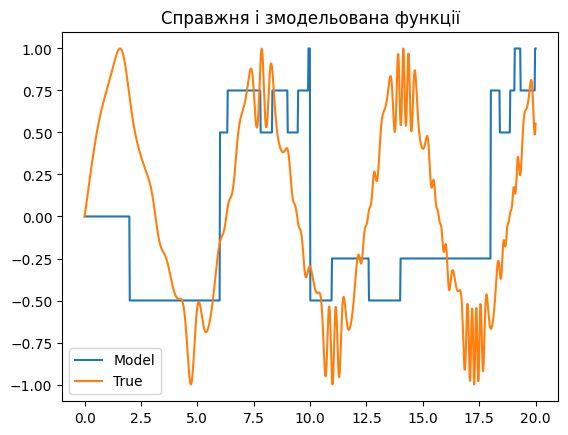


Mean Squared Error (MSE) = 0.3677986820695678
Mean Absolute Error (MAE) = 0.4859365171322268


In [11]:
rules = {}
table = [["y\\x"] + ["mx" + str(i) for i in range(1, 7)]]
for i in range(6):
    row = [f"my{i + 1}"]
    for j in range(6):
        z = np.cos(np.sin(y_means[i])) * np.sin(x_means[j])
        best_func = functionCompareGauss(z, z_means, step_z / 2)
        rules[(j, i)] = best_func
        row.append(f"mf{best_func+1}")
    table.append(row)
print("Таблица з назвами функцій")
print(tabulate(table, tablefmt="grid"))

print("\nRules:")
for rule in rules.keys():
    print(
        f"if (x is mx{rule[0] + 1}) and (y is my{rule[1] + 1}) then (z is mf{rules[rule] + 1})"
    )

z_output = []
for x in x_values:
    best_x_func = functionCompareGauss(x, x_means, step_x / 2)
    best_y_func = functionCompareGauss(x * np.sin(x) * np.cos(x), y_means, step_y / 2)
    best_z_func = rules[(best_x_func, best_y_func)]
    z_output.append(z_means[best_z_func])
z_output = np.array(z_output)

plt.plot(x_values, z_output, label="Model")
plt.plot(x_values, z_values, label="True")
plt.title("Справжня і змодельована функції")
plt.legend()
plt.show()

mse = mean_squared_error(z_values, z_output)
mae = mean_absolute_error(z_values, z_output)
print(f"\nMean Squared Error (MSE) = {mse}")
print(f"Mean Absolute Error (MAE) = {mae}")

Висновок: Для моделювання функції приналежності були використані три типи функцій — трикутні, трапецієподібні та гаусівські. Всі моделі показали схожу якість апроксимації, що підтверджується низькими значеннями похибок. Гаусівські функції приналежності зазвичай забезпечують найкращу гладкість моделі, але в цьому випадку відмінність відсутня.